<a href="https://colab.research.google.com/github/WinnieAnyoso/week-2-IP-core-/blob/master/week2_Independent_project_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question


# Define the Problem

In this project, we will analyze the dataset containing data on financial services that are used by individuals across 4 east African countries. One of the goals of the project is to describe the most used financial services. Doing so would equip the distributor with insights 

The dataset for this project can be found on the UCI Machine Learning Repository.

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. We shall get insights on the customer spending
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

## 1. Reading the Data

In [ ]:
# importing necessary libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#upload the data 
df = pd.read_csv("http://bit.ly/FinancialDataset")
#reading the data 
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 2. Data Exploration 

In [ ]:
# getting sample from data 
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
16758,Tanzania,2017,uniqueid_1956,No,Urban,No,1.0,22.0,Female,Spouse,Single/Never Married,Primary education,Self employed
20903,Tanzania,2017,uniqueid_6101,No,Rural,Yes,3.0,38.0,Female,Spouse,Single/Never Married,Primary education,Self employed
15754,Tanzania,2017,uniqueid_952,No,Urban,No,2.0,45.0,Female,Head of Household,Single/Never Married,Primary education,Self employed
9118,Rwanda,2016,uniqueid_3051,No,Rural,Yes,6.0,35.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
6810,Rwanda,2016,uniqueid_743,No,Urban,Yes,9.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [ ]:
# statistical summary 
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# shape of the dataset 
df.shape

(23524, 13)

- Dataset has 23524 records abd 13 variables 

## 3. Tidying up the data 

In [ ]:
# checking for duplicate values 
df.duplicated().any()

False

In [ ]:
# checking for null values 
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# progating null values forward
df.dropna(inplace= True)


In [ ]:
# checking for any null values after progating values 
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64


## 4. EDA



> # a) Univariate analysis



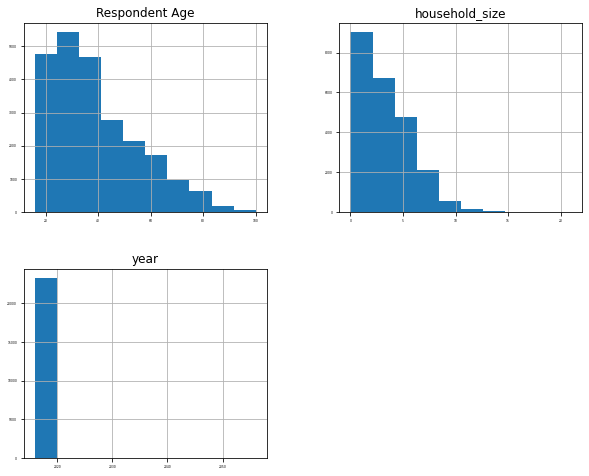

In [ ]:
# histograms 
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()



*   All columns have data skewed to the right


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


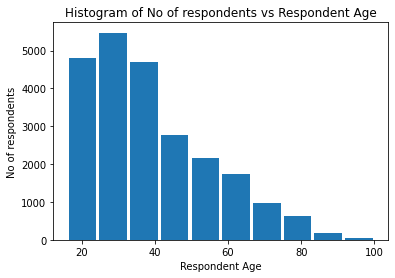

In [128]:
# bar chart 
Age = df['Respondent Age']
plt.hist(age, bins=10, histtype='bar',  rwidth=0.9 )
plt.xlabel('Respondent Age')
plt.ylabel('No of respondents')
plt.title('Histogram of No of respondents vs Respondent Age')
plt.show()

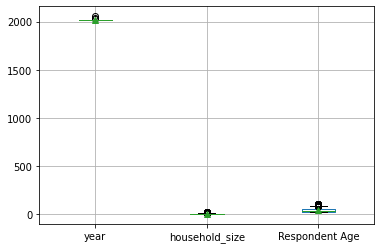

In [133]:
# box plot
df.boxplot(showmeans=True)

In [137]:
# frequency table for type of job
df['Type of Job'].value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: Type of Job, dtype: int64

In [138]:
# frequency table for level of education
df['Level of Educuation'].value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [139]:
# frequency table for marital status
df['Level of Educuation'].value_counts()



Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64




>  # Measures of central tendency



In [ ]:
# mean year 
a =df['year'].mean()
print('mean =', a)
# modal year 
b = df['year'].mode()
print('mode =',b)
# median year 
c = df['year'].median()
print('median =',c)

#

mean = 2016.9805937540161
mode = 0    2016
dtype: int64
median = 2017.0


In [ ]:
# mean household_size 
d =df['household_size'].mean()
print('mean household size =', d)
# modal household_size
e = df['household_size'].mode()
print('mode =',e)
# median household_size 
f = df['household_size'].median()
print('median household size =',f)


mean household size = 3.6886432763569377
mode = 0    2.0
dtype: float64
median household size = 3.0


In [ ]:
# mean household_size 
g =df['Respondent Age'].mean()
print('mean Respondent Age =', g)
# modal household_size
h = df['Respondent Age'].mode()
print('mode =',h)
# median household_size 
i = df['Respondent Age'].median()
print('median Respondent Age =',i)

mean Respondent Age = 38.80550914621085
mode = 0    30.0
dtype: float64
median Respondent Age = 35.0


In [ ]:
# kurtosis 
df['Respondent Age'].kurt()

0.09844652254807196



*   Respondnent age has leptokurtic distribution



# measures of dispersion 

In [120]:
df['Respondent Age'].describe()


count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

In [125]:
ab = df['Respondent Age'].skew()
print('skew =', ab)
bc = df['Respondent Age'].kurt()
print('kurtosis =', bc)

skew = 0.840661747532081
kurtosis = 0.09844652254807196




> # b) Bivariate Analysis



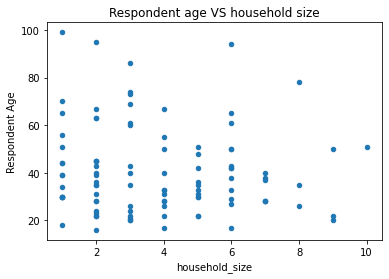

pearsons coefficient= -0.11970919507762415


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'household_size', y = 'Respondent Age')
plt.title('Respondent age VS household size')
plt.show()

# pearson's coefficient 
coeff = df["household_size"].corr(df["Respondent Age"]) 
print('pearsons coefficient=',coeff)



*   there's a weak negative correlation between household size and respondent age



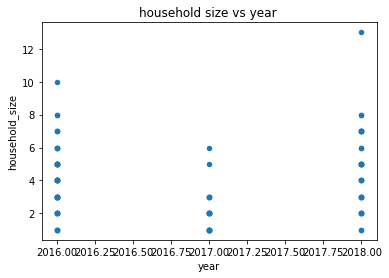

pearsons coefficient= -0.048901996192637645


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'year', y = 'household_size')
plt.title('household size vs year ')
plt.show()

# pearson's coefficient 
coeff = df["year"].corr(df["household_size"]) 
print('pearsons coefficient=',coeff)

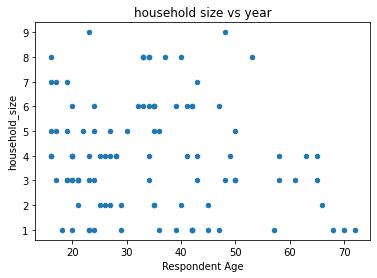

pearsons coefficient= -0.11970919507762415


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'Respondent Age', y = 'household_size')
plt.title('household size vs year')
plt.show()

# pearson's coefficient 
coeff = df["Respondent Age"].corr(df["household_size"]) 
print('pearsons coefficient=',coeff)

In [ ]:
# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

# Defining our scores...x and y
y = df['household_size']
x = df['Respondent Age']

# Then calculating the t-test
t_statistic, p_value = ttest_ind(x, y)

# Then displaying the t-statistic
t_statistic

321.7270468155308

In [ ]:
from scipy import stats
stats.zscore(df['household_size'])

array([-0.30188629,  0.57487037,  0.57487037, ...,  0.57487037,
        1.45162703,  2.76676201])



> # c) Multivariate Analysis



No handles with labels found to put in legend.


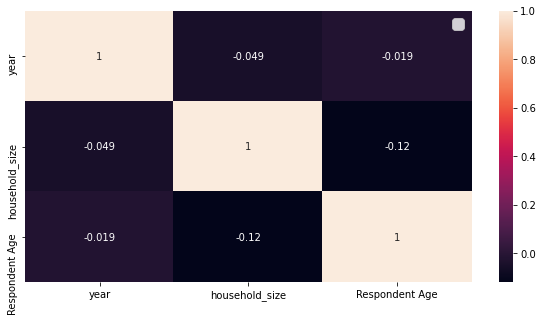

In [ ]:
corr = df.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

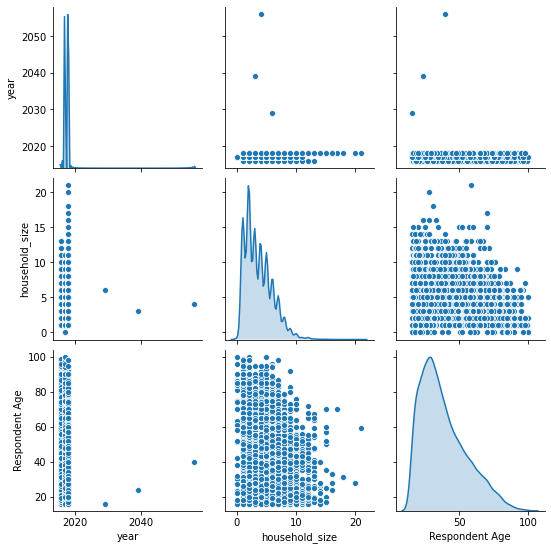

In [ ]:
# pairplot
sns.pairplot(df, diag_kind = 'kde')

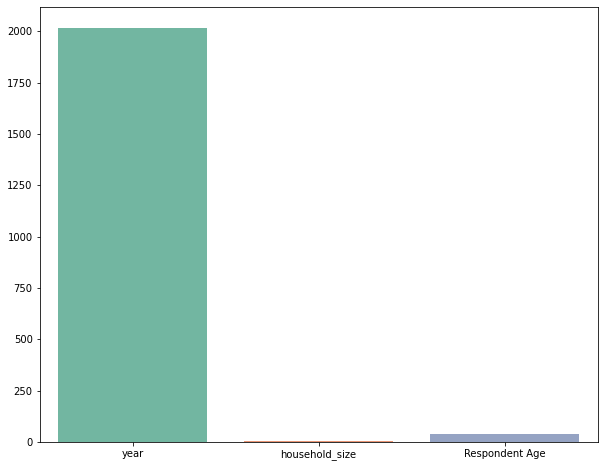

In [ ]:
plt.figure(figsize = (10,8))
_ = sns.barplot(data=df, palette="Set2")